In [1]:
# The Big 4
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# stepwise
import statsmodels.api as sm 

# Model performance metrics
from sklearn import metrics

# Sklearn model tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# random oversampling
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("1 - Project Data.csv")

In [3]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN


<h1>Data Cleaning and Initial Observations</h1>

In [4]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [5]:
df['Churn Reason'].nunique()

20

In [6]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [7]:
df['Churn Reason'].isnull().sum()

5174

In [8]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [9]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

In [12]:
city_list = list(df['City'].unique())
city_list

['Los Angeles',
 'Beverly Hills',
 'Huntington Park',
 'Lynwood',
 'Marina Del Rey',
 'Inglewood',
 'Santa Monica',
 'Torrance',
 'Whittier',
 'La Habra',
 'Pico Rivera',
 'Avalon',
 'Harbor City',
 'Lakewood',
 'Los Alamitos',
 'San Pedro',
 'Carson',
 'Long Beach',
 'Altadena',
 'Monrovia',
 'Sierra Madre',
 'Tujunga',
 'Pasadena',
 'Glendale',
 'Canoga Park',
 'Mission Hills',
 'Santa Clarita',
 'Sun Valley',
 'Stevenson Ranch',
 'Panorama City',
 'Van Nuys',
 'Burbank',
 'North Hollywood',
 'Covina',
 'El Monte',
 'La Puente',
 'Rowland Heights',
 'Ontario',
 'Pomona',
 'Rosemead',
 'San Dimas',
 'West Covina',
 'Alhambra',
 'Alpine',
 'Bonita',
 'Boulevard',
 'Guatay',
 'Jacumba',
 'Mount Laguna',
 'Borrego Springs',
 'Carlsbad',
 'Del Mar',
 'El Cajon',
 'Escondido',
 'Oceanside',
 'Pala',
 'Palomar Mountain',
 'Pauma Valley',
 'Ranchita',
 'Valley Center',
 'San Diego',
 'Indio',
 'Indian Wells',
 'Palm Desert',
 'Desert Hot Springs',
 'Holtville',
 'Niland',
 'North Palm Spring

<h2>Observations</h2>

Data is clean. Null values can be explained as they have not churned, so no reason was given. This can be addressed via OHE.

There seems to be a relationship between ZIP code and geographical data (Lat Long, Latitude, Longitude). This has been confirmed upon further review via graphs and study of the dataset. Also, too many cities, with an inbalance on the distribution of data points (many cities only have 5 entries, will others have over 300 entries). No geographical data will be used for the model.

Total Charges is equal to Tenure Months time Monthly Charges, so this can be discarded in FE. Monthly Charges are in a manageable scale, no need to process this column further.

For services, need  to change datatype from object to integer. Specifically a boolean 0-1 type, as they either have it (Yes) or they don't (No); for cases 'No internet service' or 'No phone service', these can also be mapped to 0.

**_NOTE_** - Could have OHE gender to be more inclusive, but ince data only includes 'male' or 'female', a simple boolean mapping will be applied.

<h1>Feature Engineering</h1>

In [13]:
# Function for binary mapping
def columns_binary(x):
    if x == 'Yes':
        return 1
    else:
        return 0

# Function for all steps used for Feature Engineering
def feature_eng(df):
    # Drop non-useful columns
    df = df.drop(columns = ['CustomerID', 'Count', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason', 'Total Charges'],axis = 1) # We already have Churn Value which is already a numerical 
    
    # Change yes/no(including: No internet/Phone services) to binary
    df['Senior Citizen'] = df['Senior Citizen'].apply(columns_binary)
    df['Partner'] = df['Partner'].apply(columns_binary)
    df['Dependents'] = df['Dependents'].apply(columns_binary)
    df['Phone Service'] = df['Phone Service'].apply(columns_binary)
    df['Multiple Lines'] = df['Multiple Lines'].apply(columns_binary)
    df['Online Security'] = df['Online Security'].apply(columns_binary)
    df['Device Protection'] = df['Device Protection'].apply(columns_binary)
    df['Online Backup'] = df['Online Backup'].apply(columns_binary)
    df['Tech Support'] = df['Tech Support'].apply(columns_binary)
    df['Streaming TV'] = df['Streaming TV'].apply(columns_binary)
    df['Streaming Movies'] = df['Streaming Movies'].apply(columns_binary)
    df['Paperless Billing'] = df['Paperless Billing'].apply(columns_binary)

    # Changing columns with only two results to numericals
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
    
    # OHE columns
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet Service', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment Method', dtype=int) 
    
    return df

In [14]:
df_fe = feature_eng(df)

In [15]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Senior Citizen                          7043 non-null   int64  
 2   Partner                                 7043 non-null   int64  
 3   Dependents                              7043 non-null   int64  
 4   Tenure Months                           7043 non-null   int64  
 5   Phone Service                           7043 non-null   int64  
 6   Multiple Lines                          7043 non-null   int64  
 7   Online Security                         7043 non-null   int64  
 8   Online Backup                           7043 non-null   int64  
 9   Device Protection                       7043 non-null   int64  
 10  Tech Support                            7043 non-null   int6

In [16]:
df_fe['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

<h1>Balancing the sample</h1>

An important aspect for modeling is that we have a balanced data set to work with. Since this data set is leaning towards non-chruners, an oversampling precedure will be applied.

In [17]:
def oversample(X,y):
    ''' X = a dataframe containing only the features of the data
        Y = a dataframe containing only the target
    '''
    ros = RandomOverSampler(sampling_strategy='not majority') #define random oversample model
    X_res, y_res = ros.fit_resample(X,y) #fit the random oversample to the data
    return X_res, y_res #return resampled feature and target dataframes

In [18]:
df_feature = df_fe.copy()
df_feature = df_feature.drop(columns = 'Churn Value')
df_target = df_fe['Churn Value']

In [19]:
X_res, y_res = oversample(df_feature,df_target)

In [20]:
y_res.value_counts()

Churn Value
1    5174
0    5174
Name: count, dtype: int64

In [21]:
X_res.shape

(10348, 22)

In [22]:
X_res.dtypes

Gender                                      int64
Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
Tenure Months                               int64
Phone Service                               int64
Multiple Lines                              int64
Online Security                             int64
Online Backup                               int64
Device Protection                           int64
Tech Support                                int64
Streaming TV                                int64
Streaming Movies                            int64
Paperless Billing                           int64
Monthly Charges                           float64
Internet Service_Fiber optic                int32
Internet Service_No                         int32
Contract_One year                           int32
Contract_Two year                           int32
Payment Method_Credit card (automatic)      int32


<h1>Selecting feature columns for the model</h1>

For this section, exploration of the most relevant columns to be used in the final model. StepWise exploration and getting the Importance metrics from a Decision Tree will be the tools used to define this list.

<h2>StepWise process</h2>

In [23]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = False):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [24]:
stepwise_selection(X_res, y_res)

['Tenure Months',
 'Internet Service_Fiber optic',
 'Dependents',
 'Payment Method_Electronic check',
 'Internet Service_No',
 'Online Security',
 'Contract_One year',
 'Contract_Two year',
 'Paperless Billing',
 'Tech Support',
 'Streaming Movies',
 'Partner',
 'Phone Service',
 'Multiple Lines',
 'Streaming TV']

In [25]:
feat_cols_sw = stepwise_selection(X_res, y_res)

<h2>Decision Tree process</h2>

In [26]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_res, # features from FE dataset
                                                                y_res, # target from FE dataset
                                                                test_size = 0.2, # The % allocated to test
                                                                random_state = 56) # Random state - python will retain the shuffle of dataset

In [27]:
rf = RandomForestClassifier(n_estimators=50) # Random Forests

## Check respective cross validation scores if overfitting need to tune as shown below

rf_score = cross_val_score(rf, X_train_dt, y_train_dt, cv=5)

#Step 1: Select parameters
rf_params = {
    'bootstrap': [False], 
    'n_estimators': [350], # 1 option
    'max_depth': [9], # 1 option
    'min_samples_split': [6], # 1 option
    'min_samples_leaf': [5] # 1 option
}

# Create a grid search object
gs = GridSearchCV(rf,
                  param_grid=rf_params,
                  cv=5,
                  verbose = 1,) # k = 5

# Fit grid search on the training set
gs.fit(X_train_dt, y_train_dt)

# Save my best model as a random forest model
best_rf = gs.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [28]:
# Get best accuracy score
print(gs.best_score_)

# Fetches best parameters
gs.best_params_

## How well the model does
gs.score(X_train_dt, y_train_dt)

# Explainability of Random Forest/Decision Trees - importance features
print(list(zip(X_train_dt.columns, best_rf.feature_importances_)))

0.8123947341535678
[('Gender', 0.006871315198342591), ('Senior Citizen', 0.00847384302675889), ('Partner', 0.014015322271088797), ('Dependents', 0.0888939842923323), ('Tenure Months', 0.23221753464520048), ('Phone Service', 0.006874611167799163), ('Multiple Lines', 0.008276757422462647), ('Online Security', 0.029703932739022106), ('Online Backup', 0.00927053634889735), ('Device Protection', 0.006525567111781151), ('Tech Support', 0.021192094121078003), ('Streaming TV', 0.007587368058381814), ('Streaming Movies', 0.008806679575106616), ('Paperless Billing', 0.024021647631635817), ('Monthly Charges', 0.0996601400527662), ('Internet Service_Fiber optic', 0.106384199583178), ('Internet Service_No', 0.04467003424675349), ('Contract_One year', 0.062004062890241914), ('Contract_Two year', 0.12974377923528546), ('Payment Method_Credit card (automatic)', 0.006871697438040816), ('Payment Method_Electronic check', 0.07174254811148832), ('Payment Method_Mailed check', 0.006192344832358063)]


### Modelling Features:
- Stepwise and Decision Tree importance align.
- A percentage of how important this factors are is provided by theDecision Tree calculations.
- Final Features list for the model:
    - Tenure Months
    - Internet Service_Fiber optic
    - Dependents
    - Payment Method_Electronic check
    - Internet Service_No
    - Tech Support
    - Online Security
    - Contract_One year
    - Contract_Two year
    - Paperless Billing
    - Streaming TV
    - Partner
    - Multiple Lines
    - Streaming Movies
    - Monthly Charges

<h1>Model development</h1>

Model use will be a Logistic Regression model. This model provides probability calculations, for which we can then set a threshold to determine which users and in risk of churning.

For this model, Recall needs to be maximised and Precision minimised. We want to ensure that the predictions from the model are accurately capturing those users that have already churned (maximised Recall), but model has to capture "false positives", as these are users that the model preditcs that are in risk of churning (greater amount of FP will reduce Precision).

In [50]:
# Changing name convention for clarity
# Same train/test split
# Data set oversampled and FE
X_train, X_test, y_train, y_test = train_test_split(X_res[feat_cols_sw], # features from FE dataset
                                                    y_res, # target from FE dataset
                                                    test_size = 0.2, # The % allocated to test
                                                    random_state = 56) # Random state - python will retain the shuffle of dataset

In [51]:
# Function for modeling
    # Several tests were performed to optimise the model
    # Versions tested have been kept for record purposes
def logreg(dt_feat, df_target):
    '''
    Function to generate and fit a Regression model
    
    Argument:
        - df_feat: features from the dataset (after cleaning and FE)
        - df_target: target from the dataset (after cleaning and FE)
        
    Inputs: train/test splitted dataset
    
    Output: fitted Regression model
    '''
    #Generate the logistic regression model
    lr = LogisticRegression(max_iter=1000, 
                          random_state=10)
    # lr2 = LogisticRegression(max_iter=1000, 
    #                       random_state=10,solver='liblinear')
    # lr3 = LogisticRegression(max_iter=1000, 
    #                       random_state=10,solver='newton-cholesky')
    # lr3 = LogisticRegression(max_iter=1000, 
    #                       random_state=10, multi_class='ovr')
   
    lr.fit(dt_feat, df_target) #fit the model to the training data
    
    return lr

In [52]:
def logreg_prob(model, df_feat, threshold):
    '''
    Function to calculate probabilties and add probability of churning, 
    probability of not churning and the prediction, based on the threshold.
    
    Argument:
        - model: regression model generated on previous step
        - df_feat: features from the dataset (after cleaning and FE)
        - threshold: probability needed on 'prob_churn' for prediction to be 1
        
    Inputs: model, train section of a splitted dataset and threshold value
    
    Output: train section of a splitted dataset with 3 new columns ['prob_not_churn', 'prob_churn', 'prediction']
    '''
    df_feat[['prob_not_churn', 'prob_churn']] = model.predict_proba(df_feat) 
    df_feat['prediction'] = np.where(df_feat['prob_churn'] > threshold, 1, 0)
    
    return df_feat
    

<h2>Determining Threshold</h2>

To streamline the process on determining the best threshold for the model, the team developed a function to iterate through a range of threshold values.

Once a dataset with threshold and metrics is created, a plot will be created to illustrate how metrics behave and determine best threshold for the model.

In [53]:
# Function to automatically generate data frames with probabilities and predictions

def logreg_auto(X_train, X_test, y_train, y_test, prob_thresh):
    lr = LogisticRegression(max_iter=1000, 
                          random_state=10)
    lr.fit(X_train, y_train) 
    lr.predict_proba(X_train) 
    X_train[['prob_not_churn', 'prob_churn']] = lr.predict_proba(X_train) 
    X_test[['prob_not_churn', 'prob_churn']] = lr.predict_proba(X_test)
    X_train['y_pred'] = np.where(X_train['prob_churn'] > prob_thresh, 1, 0) 
    X_test['y_pred'] = np.where(X_test['prob_churn'] > prob_thresh, 1, 0)

In [54]:
# Function to calculate all metrics for the model

def get_results(actual, predicted):
    return (metrics.confusion_matrix(actual, predicted), 
            metrics.accuracy_score(actual, predicted), 
            metrics.recall_score(actual, predicted), 
            metrics.precision_score(actual, predicted),
            metrics.f1_score(actual, predicted))

In [55]:
# Function to iterate through different models at different threshold ranges
    # It only stores results if recall is greater or equal to 0.85

def model_tester(X_train, X_test, y_train, y_test, threshold_base, threshold_size):
    thresholds = []
    results = []
    threshold = threshold_base
    
    for i in range(threshold_size):
        logreg_auto(X_train, X_test, y_train, y_test,threshold)
        recall = metrics.recall_score(y_test, X_test['y_pred'])
        if recall >= 0.85:
            thresholds.append(threshold)
            results.append(get_results(y_test, X_test['y_pred']))
        threshold += 0.01
    
    return thresholds,results

In [56]:
thresholds, results = model_tester(X_train, X_test, y_train, y_test, 0.2, 100)

In [57]:
accuracy = []
recall = []
precision = []

In [58]:
for item in results:
    accuracy.append(item[1])
    recall.append(item[2])
    precision.append(item[3])

In [59]:
metrics_comp = pd.DataFrame(data={'Threshold':thresholds,
                                  'Accuracy':accuracy,
                                  'Recall':recall,
                                  'Precision':precision
                                 })

In [60]:
threshold = metrics_comp['Threshold']
accuracy = metrics_comp['Accuracy']
recall = metrics_comp['Recall']
precision = metrics_comp['Precision']

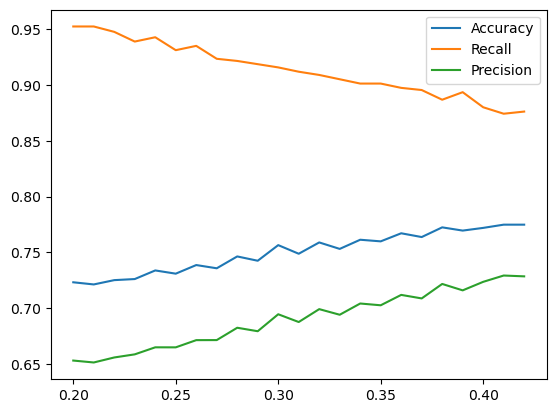

In [61]:
plt.plot(threshold, accuracy, label='Accuracy')
plt.plot(threshold, recall, label='Recall')
plt.plot(threshold, precision, label='Precision')
# plt.vlines(x = 0.3, ymin = .65, ymax = .95, color = 'green', linewidth = 3)
plt.legend()
plt.show()

In [62]:
metrics_comp[metrics_comp['Precision'] <= .7].sort_values(by='Precision',ascending=False).head()

,Threshold,Accuracy,Recall,Precision
12,0.32,0.758937,0.909179,0.699108
10,0.30,0.756522,0.915942,0.694505
13,0.33,0.753140,0.905314,0.694074
11,0.31,0.748792,0.912077,0.687546
8,0.28,0.746377,0.921739,0.682403


<h2>Threshold Selection</h2>

After running through 'model_tester', the team decided that best threshold for the model is 0.32.

As previously stated, Recall needs to be maximised and Precision needs to be as low as possible; another factor to consider is the level of urgency.

With a threshold too low, model may seem too "alarmist" and create a list that is too big, while also potentially deterring users to stay in the network if they feel inundated with promotions.

Taking everything into account, team decided to ensure Precision is below 70%, which still results in an Recall of 90.9%, and the end result is that a user will be flagged as a risk for churning if the probability of churning is above 32%.

<h2>Final model and predictions</h2>

In [63]:
feat_train, feat_test, target_train, target_test = train_test_split(X_res[feat_cols_sw], # features from FE dataset
                                                                    y_res, # target from FE dataset
                                                                    test_size = 0.2, # The % allocated to test
                                                                    random_state = 56) # Random state - python will retain the shuffle of dataset

In [64]:
churn_predictor = logreg(feat_train, target_train)

In [67]:
predictions = logreg_prob(churn_predictor, df_fe[feat_cols_sw], 0.32)

C:\Users\danih\AppData\Local\Temp\ipykernel_48616\2392312145.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat[['prob_not_churn', 'prob_churn']] = model.predict_proba(df_feat)
C:\Users\danih\AppData\Local\Temp\ipykernel_48616\2392312145.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat[['prob_not_churn', 'prob_churn']] = model.predict_proba(df_feat)
C:\Users\danih\AppData\Local\Temp\ipykernel_48616\2392312145.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [69]:
predictions.head()

,Tenure Months,Internet Service_Fiber optic,Dependents,Payment Method_Electronic check,Internet Service_No,Online Security,Contract_One year,Contract_Two year,Paperless Billing,Tech Support,Streaming Movies,Partner,Phone Service,Multiple Lines,Streaming TV,prob_not_churn,prob_churn,prediction
0,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.420216,0.579784,1
1,2,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0.433734,0.566266,1
2,8,1,1,1,0,0,0,0,1,0,1,0,1,1,1,0.289808,0.710192,1
3,28,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0.438350,0.561650,1
4,49,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0.705204,0.294796,0


In [70]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tenure Months                    7043 non-null   int64  
 1   Internet Service_Fiber optic     7043 non-null   int32  
 2   Dependents                       7043 non-null   int64  
 3   Payment Method_Electronic check  7043 non-null   int32  
 4   Internet Service_No              7043 non-null   int32  
 5   Online Security                  7043 non-null   int64  
 6   Contract_One year                7043 non-null   int32  
 7   Contract_Two year                7043 non-null   int32  
 8   Paperless Billing                7043 non-null   int64  
 9   Tech Support                     7043 non-null   int64  
 10  Streaming Movies                 7043 non-null   int64  
 11  Partner                          7043 non-null   int64  
 12  Phone Service       

In [71]:
predictions['CustomerID'] = df['CustomerID']

C:\Users\danih\AppData\Local\Temp\ipykernel_48616\3026312648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['CustomerID'] = df['CustomerID']


In [80]:
predictions['Churn Value'] = df['Churn Value']

C:\Users\danih\AppData\Local\Temp\ipykernel_48616\1169579060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Churn Value'] = df['Churn Value']


In [89]:
predictions.head()

,Tenure Months,Internet Service_Fiber optic,Dependents,Payment Method_Electronic check,Internet Service_No,Online Security,Contract_One year,Contract_Two year,Paperless Billing,Tech Support,Streaming Movies,Partner,Phone Service,Multiple Lines,Streaming TV,prob_not_churn,prob_churn,prediction,CustomerID,Churn Value
0,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.420216,0.579784,1,3668-QPYBK,1
1,2,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0.433734,0.566266,1,9237-HQITU,1
2,8,1,1,1,0,0,0,0,1,0,1,0,1,1,1,0.289808,0.710192,1,9305-CDSKC,1
3,28,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0.438350,0.561650,1,7892-POOKP,1
4,49,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0.705204,0.294796,0,0280-XJGEX,1


In [90]:
pred_prob = predictions[predictions['Churn Value'] == 0]

In [91]:
pred_prob = pred_prob[['prob_churn', 'CustomerID']]

In [101]:
top_risk_churn = pred_prob.sort_values(by='prob_churn',ascending = False).reset_index()

In [103]:
top_500_risk_churn = top_risk_churn.head(500)

In [104]:
rest_risk_churn = top_risk_churn[top_risk_churn.index > 499]

In [107]:
top_500_risk_churn.to_csv("Top 500 risk to churn.csv", index=False)

In [108]:
rest_risk_churn.to_csv("List of risk to churn.csv", index=False)